In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import keras
import keras.backend as K
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

Using TensorFlow backend.


In [0]:
#@title Load and preprocess data

from keras.datasets import cifar10

label = ['airplane', 'automobile', 'bird', 'cat', 'deer',
         'dog', 'frog', 'horse', 'ship', 'truck']

(train_images, train_labels), (test_images, test_labels) =  cifar10.load_data()

def preprocess(images, labels):
  labels = keras.utils.to_categorical(labels)
  images = images.astype('float32') / 255
  return images, labels

train_images, train_labels = preprocess(train_images, train_labels)
test_images, test_labels = preprocess(test_images, test_labels)

# Define and train the model.

In [3]:
input_shape = train_images.shape[1:]
num_labels = train_labels.shape[1]
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

def conv(x):
  return keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, activation=K.relu, padding='same')(x)

def pool(x):
  return keras.layers.MaxPooling2D(pool_size)(x)


inputs = keras.Input(shape=input_shape)
x = conv(inputs)
x = pool(x)
x = conv(x)
x = pool(x)
x = conv(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(dropout)(x)
outputs = keras.layers.Dense(num_labels, activation=K.softmax)(x)
model = keras.Model(inputs, outputs)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)    

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels,
                 validation_data=(test_images, test_labels),
                 epochs=10, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 218us/step - loss: 1.5336 - acc: 0.4473 - val_loss: 1.2663 - val_acc: 0.5515
Epoch 2/10
50000/50000 [==============================] - 9s 175us/step - loss: 1.1632 - acc: 0.5890 - val_loss: 1.0905 - val_acc: 0.6129
Epoch 3/10
50000/50000 [==============================] - 9s 172us/step - loss: 1.0052 - acc: 0.6495 - val_loss: 0.9548 - val_acc: 0.6601
Epoch 4/10
50000/50000 [==============================] - 9s 173us/step - loss: 0.8990 - acc: 0.6879 - val_loss: 0.8760 - val_acc: 0.6895
Epoch 5/10
50000/50000 [==============================] - 9s 174us/step - loss: 0.8254 - acc: 0.7146 - val_loss: 0.9202 - val_acc: 0.6763
Epoch 6/10
50000/50000 [==============================] - 9s 173us/step - loss: 0.7768 - acc: 0.7312 - val_loss: 0.8006 - val_acc: 0.7250
Epoch 7/10
50000/50000 [==============================] - 9s 173us/step -

# Inspect predictions

In [0]:
images, labels = train_images, train_labels

predictions = model.predict(images)
entropies = scipy.stats.entropy(predictions.T)
most_confusing_idx = np.argsort(entropies)[::-1]
wrong_idx = np.nonzero(np.argmax(predictions, axis=1) != np.argmax(labels, axis=1))[0]

In [0]:
def plot_predictions(indices):
  fig, ax = plt.subplots(2, len(indices), figsize=(2* len(indices), 2* 2), sharey='row')
  for i, j in enumerate(indices):
    ax[0, i].imshow(images[j], interpolation='none')
    ax[0, i].axis('off')
    ax[0, i].set_title(label[np.argmax(labels[j])])
    ax[1, i].barh(range(10), predictions[j])
    ax[1, i].set_ylim((-.5, 9.5))
    ax[1, i].get_xaxis().set_visible(False)
    ax[1, i].set_yticks(range(10))
    ax[1, i].set_yticklabels(label)
  plt.show()

most confusing:


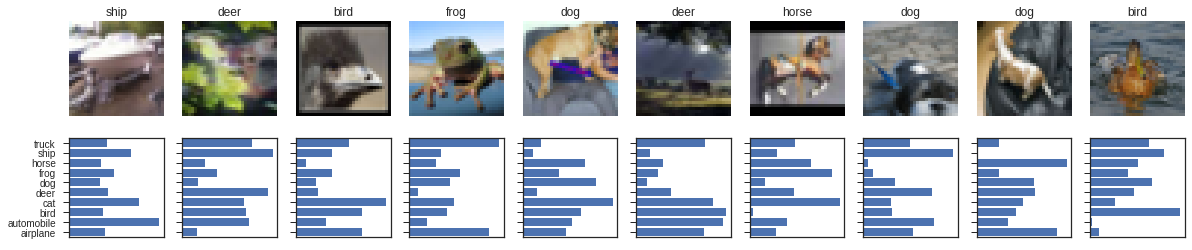


least confusing:


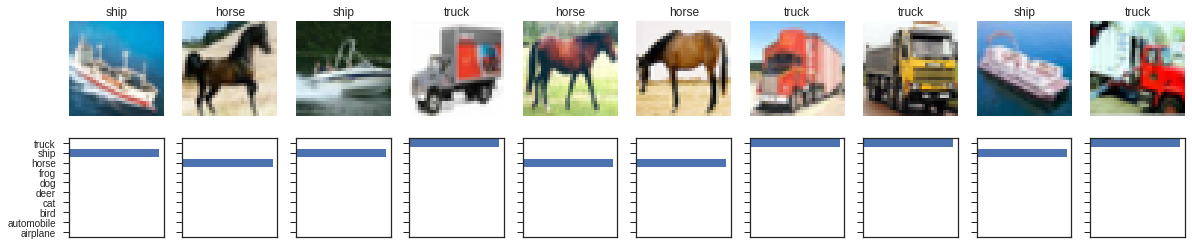

In [7]:
print('most confusing:')
plot_predictions(most_confusing_idx[:10])

print('\nleast confusing:')
plot_predictions(most_confusing_idx[-10:])

some wrong predictions:


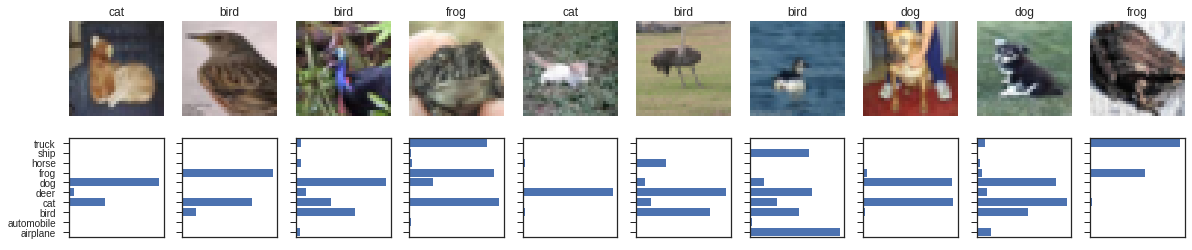

In [8]:
print('some wrong predictions:')
plot_predictions(wrong_idx[:10])